In [1]:
import open3d as o3d
import numpy as np

pcd_file_PATH = "bin_file.pcd"

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# pcd file 읽기
pcd = o3d.io.read_point_cloud(pcd_file_PATH)
print(pcd)

PointCloud with 115384 points.


In [3]:
# visualization 
o3d.visualization.draw_geometries([pcd])

In [4]:
# point cloud -> numpy
print(pcd.points) # c++로 구성

pcd_np = np.asarray(pcd.points) 
print(pcd_np)

std::vector<Eigen::Vector3d> with 115384 elements.
Use numpy.asarray() to access data.
[[ 1.83239994e+01  4.89999987e-02  8.28999996e-01]
 [ 1.83439999e+01  1.05999999e-01  8.28999996e-01]
 [ 5.12989998e+01  5.04999995e-01  1.94400001e+00]
 ...
 [ 3.71799994e+00 -1.40600002e+00 -1.73699999e+00]
 [ 3.71399999e+00 -1.39100003e+00 -1.73300004e+00]
 [ 3.96700001e+00 -1.47399998e+00 -1.85699999e+00]]


In [5]:
# numpy -> point cloud
A = np.random.random((1000, 3)) * 1000 

# numpy -> Open3D에서 사용하는 형식으로 transform
# pcd로 transform될 수 있도록 좌표값에 대한 정보를 3열로 이용해야함 -> x, y, z를 사용하기 위해
pcd.points = o3d.utility.Vector3dVector(A) 

o3d.visualization.draw_geometries([pcd])

## Voxel Grid Downsampling

* 원본 데이터를 그대로 사용할 경우, 정보는 많으나 데이터를 처리하는 데 시간이 너무 많이 필요하다.

* 실제 알고리즘을 처리할 때, 필요한 시간을 줄이기 위함이다.

* LIDAR point cloud에서 downsampling하는 대표적 방법 : Voxel Grid 기반의 downsampling


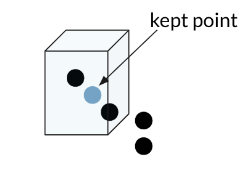 

* Voxel Grid 내부에 점이 여러 개가 있다고 하더라도 Point Cloud가 1개만 남고, 나머지는 없어지므로 과도하게 많은 정보를 제거한다

* parameter는 Voxel Grid의 크기, 단위는 meter

* downsampling을 수행할 대, 각 Grid안에서 Point Cloud들의 평균 위치를 계산하고, 이 평균 위치에 새로운 Point Cloud를 생성한다. 이렇게 생성된 새로운 Point Cloud는 기존의 여러 point들을 대표하는 역할을 하게 된다.

In [6]:
# DownSampling (voxel_down_sample)
pcd = o3d.io.read_point_cloud(pcd_file_PATH)
print('Before DownSampling {}'.format(len(pcd.points)))

pcd = pcd.voxel_down_sample(voxel_size = 0.3) # 0.2meter
print('After DownSampling {}'.format(len(pcd.points)))

o3d.visualization.draw_geometries([pcd], width = 640, height = 480)

Before DownSampling 115384
After DownSampling 13472


In [8]:
# DownSampling (uniform_down_sample)
pcd = o3d.io.read_point_cloud(pcd_file_PATH)
print('Before DownSampling {}'.format(len(pcd.points)))

pcd = pcd.uniform_down_sample(every_k_points = 10) # 원래 대비 1/10정도가 줄어드는 결과(1/n)
print('After DownSampling {}'.format(len(pcd.points)))

Before DownSampling 115384
After DownSampling 11539
